In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import copy

In [2]:
source_dir = "images/"
save_dir = "save/"

In [3]:
def show_image(image, title, save_name=None):
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    if save_name is not None:
        plt.savefig(save_dir + save_name)
    plt.show()

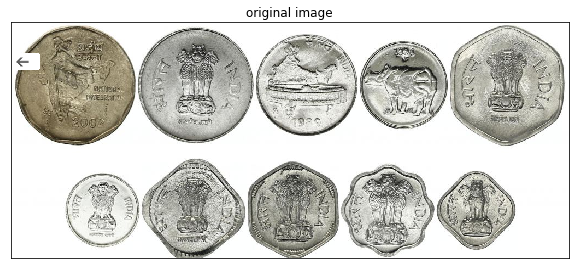

In [4]:
source_image = cv2.imread(source_dir + "Circles.png")
show_image(source_image, "original image")

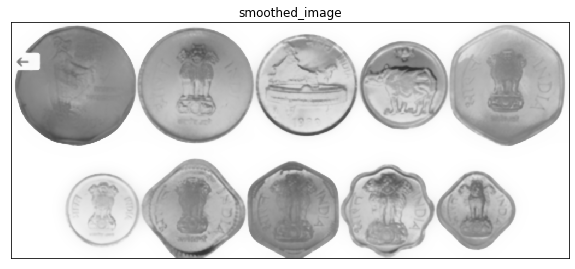

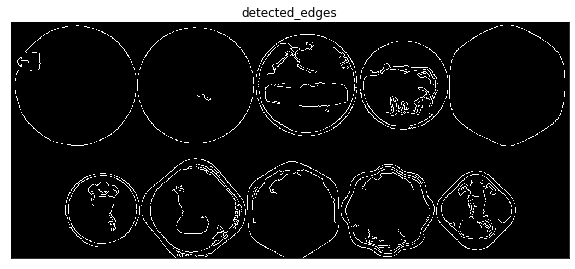

In [13]:
grayscale = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)
image_with_circles = np.copy(source_image)

smoothed_image = cv2.GaussianBlur(grayscale, (7, 7), 0)
smoothed_image = cv2.bilateralFilter(smoothed_image, 50, 30, 100)
show_image(smoothed_image, "smoothed_image")

detected_edges = cv2.Canny(smoothed_image, 20, 250)
show_image(detected_edges, "detected_edges")


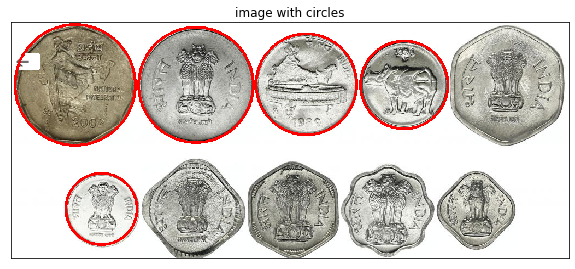

In [26]:
image_with_circles = copy.deepcopy(source_image)
circles = cv2.HoughCircles(smoothed_image, 
                           cv2.HOUGH_GRADIENT, 
                           1, 
                           minDist = 30, 
                           param1 = 250, 
                           param2 = 40, 
                           minRadius = 50, 
                           maxRadius = 200)

for circle in circles[0, :]:
    cv2.circle(image_with_circles, (circle[0], circle[1]), circle[2], (0, 0, 255), 4)
    
show_image(image_with_circles, "image with circles", "2-detected_circles")
